In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
from pathlib import Path
import json

import numpy as np
import pandas as pd
import anndata as ad

import matplotlib.pyplot as plt

%matplotlib inline
import sys
sys.path.append("/code/")

In [5]:
a = ['x_reconstructed','y_reconstructed',
                                        'z_reconstructed']
len(a)

3

In [9]:
ABC_ROOT = Path("/data/abc_atlas/")

In [14]:
ccf_df = pd.read_csv(
            ABC_ROOT/"metadata/Allen-CCF-2020/20230630/parcellation_to_parcellation_term_membership.csv"
            )
ccf_df
# [(ccf_df['parcellation_term_acronym']=='TH')
       # |(ccf_df['parcellation_term_acronym']=='ZI')]

parcellation_label             parcellation_term_label  \
0     AllenCCF-Annotation-2020-997          AllenCCF-Ontology-2017-997   
1      AllenCCF-Annotation-2020-68          AllenCCF-Ontology-2017-997   
2      AllenCCF-Annotation-2020-68            AllenCCF-Ontology-2017-8   
3      AllenCCF-Annotation-2020-68          AllenCCF-Ontology-2017-315   
4      AllenCCF-Annotation-2020-68          AllenCCF-Ontology-2017-184   
...                            ...                                 ...   
3435  AllenCCF-Annotation-2020-145      ABC-Ontology-2023-V4-structure   
3436  AllenCCF-Annotation-2020-145   ABC-Ontology-2023-V4-substructure   
3437  AllenCCF-Annotation-2020-153  ABC-Ontology-2023-V4r-substructure   
3438  AllenCCF-Annotation-2020-164       ABC-Ontology-2023-c-structure   
3439  AllenCCF-Annotation-2020-164    ABC-Ontology-2023-c-substructure   

      parcellation_term_set_label  parcellation_index  voxel_count  \
0     AllenCCF-Ontology-2017-ORGA                 987      3564320   
1     AllenCCF-Ontology-2017-ORGA                  63       256520   
2     AllenCCF-Ontology-2017-CATE                  63       256520   
3     AllenCCF-Ontology-2017-DIVI                  63       256520   
4     AllenCCF-Ontology-2017-STRU                  63       256520   
...                           ...                 ...          ...   
3435  AllenCCF-Ontology-2017-STRU                 140       499566   
3436  AllenCCF-Ontology-2017-SUBS                 140       499566   
3437  AllenCCF-Ontology-2017-SUBS                 148       461680   
3438  AllenCCF-Ontology-2017-STRU                 159          432   
3439  AllenCCF-Ontology-2017-SUBS                 159          432   

      volume_mm3 color_hex_triplet  red  green  blue  \
0       3.564320           #FFFFFF  255    255   255   
1       0.256520           #FFFFFF  255    255   255   
2       0.256520           #BFDAE3  191    218   227   
3       0.256520           #70FF71  112    255   113   
4       0.256520           #268F45   38    143    69   
...          ...               ...  ...    ...   ...   
3435    0.499566           #AAAAAA  170    170   170   
3436    0.499566           #AAAAAA  170    170   170   
3437    0.461680           #AAAAAA  170    170   170   
3438    0.000432           #AAAAAA  170    170   170   
3439    0.000432           #AAAAAA  170    170   170   

                  parcellation_term_name parcellation_term_acronym  \
0                                  brain                     brain   
1                                  brain                     brain   
2          Basic cell groups and regions                      grey   
3                              Isocortex                 Isocortex   
4          Frontal pole, cerebral cortex                       FRP   
...                                  ...                       ...   
3435        fourth ventricle, unassigned             V4-unassigned   
3436        fourth ventricle, unassigned             V4-unassigned   
3437                      lateral recess                       V4r   
3438  central canal, spinal cord/medulla                         c   
3439  central canal, spinal cord/medulla                         c   

     parcellation_term_set_name  term_set_order  term_order  \
0                         organ               0           0   
1                         organ               0           0   
2                      category               1           1   
3                      division               2           1   
4                     structure               3           1   
...                         ...             ...         ...   
3435                  structure               3         367   
3436               substructure               4         885   
3437               substructure               4         886   
3438                  structure               3         369   
3439               substructure               4         887   

               

In [11]:
ccf_set_df = pd.read_csv(
            ABC_ROOT/"metadata/Allen-CCF-2020/20230630/parcellation_term_set_membership.csv"
            )
ccf_set_df

parcellation_term_label  parcellation_term_set_label  \
0             AllenCCF-Ontology-2017-997  AllenCCF-Ontology-2017-ORGA   
1               AllenCCF-Ontology-2017-8  AllenCCF-Ontology-2017-CATE   
2            AllenCCF-Ontology-2017-1009  AllenCCF-Ontology-2017-CATE   
3              AllenCCF-Ontology-2017-73  AllenCCF-Ontology-2017-CATE   
4             AllenCCF-Ontology-2017-315  AllenCCF-Ontology-2017-DIVI   
...                                  ...                          ...   
1288      ABC-Ontology-2023-V4-structure  AllenCCF-Ontology-2017-STRU   
1289   ABC-Ontology-2023-V4-substructure  AllenCCF-Ontology-2017-SUBS   
1290  ABC-Ontology-2023-V4r-substructure  AllenCCF-Ontology-2017-SUBS   
1291       ABC-Ontology-2023-c-structure  AllenCCF-Ontology-2017-STRU   
1292    ABC-Ontology-2023-c-substructure  AllenCCF-Ontology-2017-SUBS   

                   parent_term_label  term_order  
0                                NaN           0  
1         AllenCCF-Ontology-2017-997           1  
2         AllenCCF-Ontology-2017-997           2  
3         AllenCCF-Ontology-2017-997           3  
4           AllenCCF-Ontology-2017-8           1  
...                              ...         ...  
1288      AllenCCF-Ontology-2017-145         367  
1289  ABC-Ontology-2023-V4-structure         885  
1290      AllenCCF-Ontology-2017-153         886  
1291      AllenCCF-Ontology-2017-164         369  
1292   ABC-Ontology-2023-c-structure         887  

[1293 rows x 4 columns]

# Load abc atlas metadata

In [2]:
abc_root = Path("/data/abc_atlas/")
brain_id = 'C57BL6J-638850'
version = '20230830'

In [3]:
# load in the 'obs' cluster_annotations + parcellation_annotation metadata
ccf_md_df = pd.read_csv(abc_root/f'metadata/MERFISH-{brain_id}-CCF/{version}/views/cell_metadata_with_parcellation_annotation.csv', 
                        dtype={'cell_label':str}, 
                        index_col=0)

# flip y coords so the sections don't display upside down
flip_y=True
if flip_y:
    ccf_md_df[['y_section', 'y_reconstructed']] *= -1

# Define an expansive spatial boundary of thalamus

In [118]:
from shapely import Polygon, MultiPoint, LineString
from shapely.plotting import plot_polygon, plot_line
import shapely
from thalamus_merfish_analysis import ccf_polygons as cpoly

from importlib import reload
reload(cpoly);

In [119]:
# find the sections that contain TH or ZI cells
th_zi_sections = ccf_md_df[(ccf_md_df['parcellation_division']=='TH') 
                           | (ccf_md_df['parcellation_structure']=='ZI')
                          ]['brain_section_label'].unique()
th_zi_sections = sorted(list(th_zi_sections))
# len(th_zi_sections)

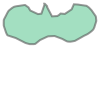

In [129]:
test_sec = th_zi_sections[6]
th_zi_df = ccf_md_df[( (ccf_md_df['parcellation_division']=='TH') 
                       | (ccf_md_df['parcellation_structure']=='ZI'))
                     & (ccf_md_df['brain_section_label']==test_sec)]

test_poly = cpoly.get_polygon_from_obs(th_zi_df, strategy='midline',
                                        x_field='x_section', y_field='y_section')
test_poly

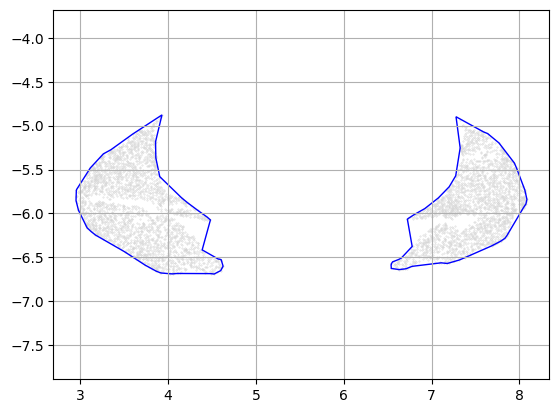

In [121]:
test_poly

plt.scatter(th_zi_df.x_section, th_zi_df.y_section, s=0.1, c='lightgrey')
plt.gca().axis('equal')
plot_polygon(test_poly, add_points=False, facecolor='none', color='b')
plt.show()

In [130]:
th_zi_convex_hull_dict = dict()
th_zi_concave_hull_dict = dict()
th_zi_concave_hull_hdbscan_dict = dict()
th_zi_concave_hull_midline_dict = dict()
th_zi_concave_hull_hdbscan_buffer_dict = dict()
th_zi_concave_hull_midline_buffer_dict = dict()

for i, sec in enumerate(th_zi_sections):
    curr_sec_id = sec

    th_zi_df = ccf_md_df[( (ccf_md_df['parcellation_division']=='TH') 
                           | (ccf_md_df['parcellation_structure']=='ZI'))
                         & (ccf_md_df['brain_section_label']==curr_sec_id)].copy()
    if th_zi_df.empty:
        continue

    # make a shapely multipoint object
    th_zi_coords = list(zip(th_zi_df.x_section, th_zi_df.y_section))
    th_zi_multipoint = MultiPoint(th_zi_coords)
    # th_zi_multipoint.bounds

    # set buffer distance
    buffer_dist = 0.1

    # calculate convex hull
    th_zi_convex_hull = th_zi_multipoint.convex_hull
    # use buffer to expand convex hull outline a bit
    th_zi_convex_hull_buffer = shapely.buffer(th_zi_convex_hull, buffer_dist)
    # store
    th_zi_convex_hull_dict[curr_sec_id] = th_zi_convex_hull_buffer

    # calculate concave hull
    # standard on all cells
    th_zi_concave_hull = shapely.concave_hull(th_zi_multipoint)
    # use buffer to expand to something that's more like an outline
    th_zi_concave_hull_buffer = shapely.buffer(th_zi_concave_hull, buffer_dist)
    # remove interior holes by making a new Polygon out of the exterior coords
    th_zi_concave_hull_buffer = Polygon(th_zi_concave_hull_buffer.exterior.coords)
    # store
    th_zi_concave_hull_dict[curr_sec_id] = th_zi_concave_hull_buffer
    
    # attempt to split cells across the midline before doing concave hull
    # using hdbscan method
    th_zi_concave_hull_hdbscan = cpoly.get_polygon_from_obs(th_zi_df, 
                                                            strategy='hdbscan',
                                                            x_field='x_section', 
                                                            y_field='y_section')
    th_zi_concave_hull_hdbscan_dict[curr_sec_id] = th_zi_concave_hull_hdbscan
     # use buffer to expand to something that's more like an outline
    th_zi_concave_hull_hdbscan_buffer = shapely.buffer(th_zi_concave_hull_hdbscan, buffer_dist)
    # remove interior holes by making a new Polygon out of the exterior coords
    if th_zi_concave_hull_hdbscan_buffer.geom_type == 'Polygon':
        th_zi_concave_hull_hdbscan_buffer = Polygon(th_zi_concave_hull_hdbscan_buffer.exterior.coords)
    # store
    th_zi_concave_hull_hdbscan_buffer_dict[curr_sec_id] = th_zi_concave_hull_hdbscan_buffer
    
    # using midline method
    th_zi_concave_hull_midline = cpoly.get_polygon_from_obs(th_zi_df, 
                                                            strategy='midline',
                                                            x_field='x_section', 
                                                            y_field='y_section')
    th_zi_concave_hull_midline_dict[curr_sec_id] = th_zi_concave_hull_midline
     # use buffer to expand to something that's more like an outline
    th_zi_concave_hull_midline_buffer = shapely.buffer(th_zi_concave_hull_midline, buffer_dist)
    # remove interior holes by making a new Polygon out of the exterior coords
    if th_zi_concave_hull_midline_buffer.geom_type == 'Polygon':
        th_zi_concave_hull_midline_buffer = Polygon(th_zi_concave_hull_midline_buffer.exterior.coords)
    # store
    th_zi_concave_hull_midline_buffer_dict[curr_sec_id] = th_zi_concave_hull_midline_buffer

In [131]:
th_zi_concave_hull_dict

{'C57BL6J-638850.29': <POLYGON ((2.946 -5.482, 2.941 -5.463, 2.94 -5.442, 2.944 -5.423, 2.949 -5.4...>,
 'C57BL6J-638850.30': <POLYGON ((3.006 -5.919, 3.005 -5.917, 2.997 -5.9, 2.993 -5.882, 2.992 -5.86...>,
 'C57BL6J-638850.31': <POLYGON ((2.966 -5.863, 2.958 -5.841, 2.954 -5.823, 2.952 -5.804, 2.955 -5....>,
 'C57BL6J-638850.32': <POLYGON ((3.019 -5.843, 3.017 -5.831, 3.019 -5.811, 3.024 -5.792, 3.03 -5.7...>,
 'C57BL6J-638850.33': <POLYGON ((2.859 -5.765, 2.856 -5.753, 2.853 -5.735, 2.855 -5.716, 2.86 -5.6...>,
 'C57BL6J-638850.35': <POLYGON ((2.657 -5.67, 2.658 -5.658, 2.662 -5.639, 2.669 -5.622, 2.68 -5.60...>,
 'C57BL6J-638850.36': <POLYGON ((2.614 -5.336, 2.614 -5.333, 2.615 -5.318, 2.621 -5.295, 2.631 -5....>,
 'C57BL6J-638850.37': <POLYGON ((2.676 -5.892, 2.671 -5.874, 2.671 -5.854, 2.675 -5.834, 2.682 -5....>,
 'C57BL6J-638850.38': <POLYGON ((2.781 -5.462, 2.781 -5.458, 2.782 -5.442, 2.777 -5.431, 2.772 -5....>,
 'C57BL6J-638850.39': <POLYGON ((2.767 -5.431, 2.766 -5.426, 2.7

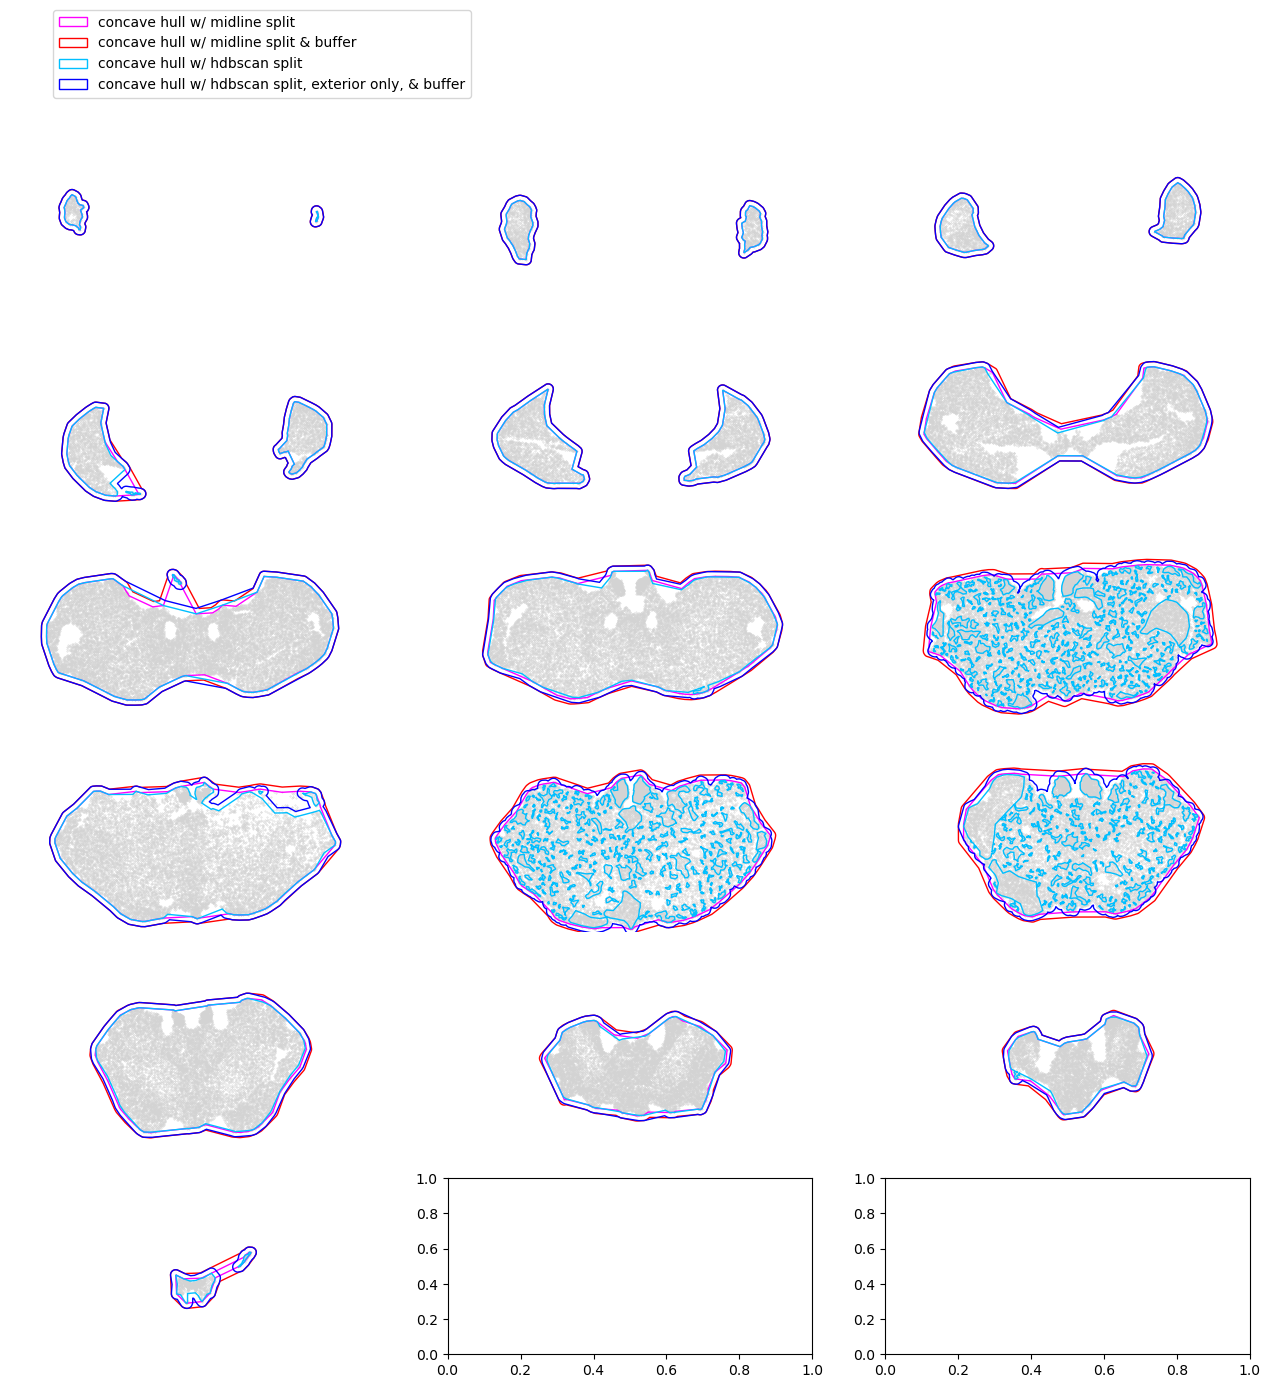

In [136]:
n_col = 3
n_row = int(np.ceil(len(th_zi_sections) / n_col))
fig, axes = plt.subplots(n_row, n_col, figsize=(16,16))
axes = axes.ravel()

x_min = 2.5
x_max = 8.5
y_min = -7.5
y_max = -3.5

for i, sec in enumerate(th_zi_sections):
    ax = axes[i]
    
    curr_sec_df = ccf_md_df[( (ccf_md_df['parcellation_division']=='TH') 
                              | (ccf_md_df['parcellation_structure']=='ZI'))
                            & (ccf_md_df['brain_section_label']==sec)
                            & (ccf_md_df['x_section']>x_min)
                            & (ccf_md_df['x_section']<x_max)
                            & (ccf_md_df['y_section']>y_min)
                            & (ccf_md_df['y_section']<y_max)]
    
    ax.scatter(curr_sec_df.x_section, curr_sec_df.y_section, s=0.1, c='lightgrey')
    ax.axis('equal')
    ax.axis('off')
    ax.set_xlim((2,9))
    ax.set_ylim((-8,-3))
    ax.set_xticks([])
    ax.set_yticks([])
    # plot_polygon(th_zi_concave_hull_dict[sec], ax=ax, 
    #              add_points=False, facecolor='none', color='k', label='concave hull w/ buffer')
    plot_polygon(th_zi_concave_hull_midline_dict[sec], ax=ax, 
                 add_points=False, facecolor='none', color='magenta', label='concave hull w/ midline split')
    plot_polygon(th_zi_concave_hull_midline_buffer_dict[sec], ax=ax, 
                 add_points=False, facecolor='none', color='r', label='concave hull w/ midline split & buffer')
    plot_polygon(th_zi_concave_hull_hdbscan_dict[sec], ax=ax, 
                 add_points=False, facecolor='none', color='deepskyblue', label='concave hull w/ hdbscan split')
    plot_polygon(th_zi_concave_hull_hdbscan_buffer_dict[sec], ax=ax, 
                 add_points=False, facecolor='none', color='b', label='concave hull w/ hdbscan split, exterior only, & buffer')
    if i==0:
        ax.legend(loc='lower left', bbox_to_anchor=(0.1,1.1))

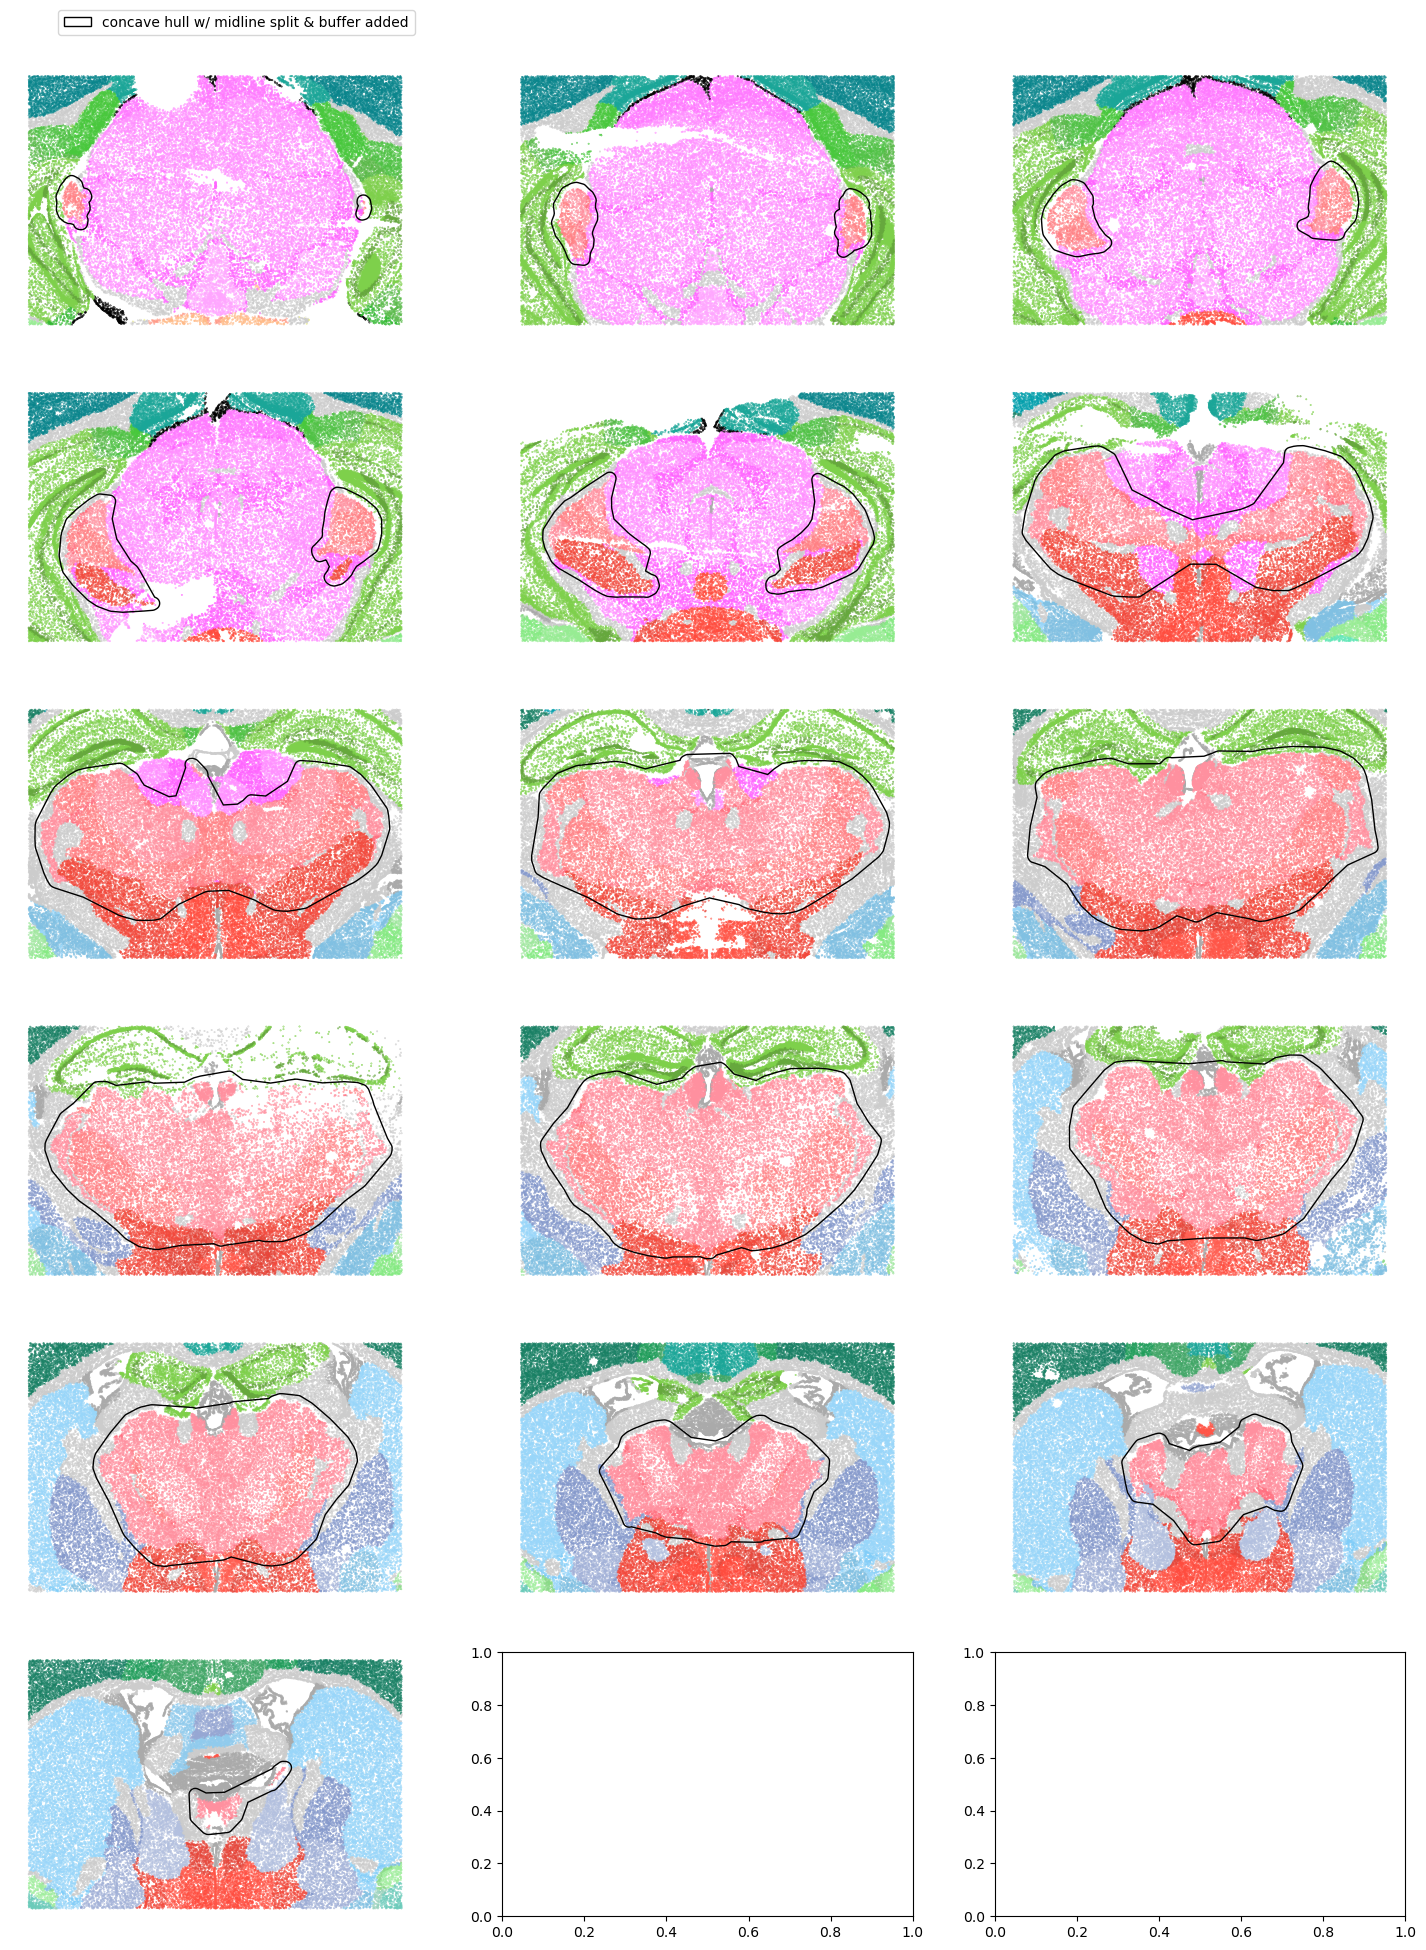

In [137]:
n_col = 3
n_row = int(np.ceil(len(th_zi_sections) / n_col))
fig, axes = plt.subplots(n_row, n_col, figsize=(18,24))
axes = axes.ravel()

x_min = 2.5
x_max = 8.5
y_min = -7.5
y_max = -3.5

for i, sec in enumerate(th_zi_sections):
    ax = axes[i]
    
    curr_sec_df = ccf_md_df[(ccf_md_df['brain_section_label']==sec)
                            & (ccf_md_df['x_section']>x_min)
                            & (ccf_md_df['x_section']<x_max)
                            & (ccf_md_df['y_section']>y_min)
                            & (ccf_md_df['y_section']<y_max)]

    ax.scatter(curr_sec_df['x_section'], curr_sec_df['y_section'],
                color=curr_sec_df['parcellation_substructure_color'],
                s=0.5, marker='.', zorder=1)
    
    ax.set_xlim((x_min,x_max))
    ax.set_ylim((y_min,y_max))
    ax.axis('equal')
    ax.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])
    
    plot_polygon(th_zi_concave_hull_midline_buffer_dict[sec], ax=ax, 
                 add_points=False, facecolor='none', color='k', 
                 label='concave hull w/ midline split & buffer added')
    if i==0:
        ax.legend(loc='lower left', bbox_to_anchor=(0.1,1.1)) 

In [2]:
n_col = 3
n_row = int(np.ceil(len(th_zi_sections) / n_col))
fig, axes = plt.subplots(n_row, n_col, figsize=(18,24))
axes = axes.ravel()

x_min = 2.5
x_max = 8.5
y_min = -7.5
y_max = -3.5

for i, sec in enumerate(th_zi_sections):
    ax = axes[i]
    
    curr_sec_df = ccf_md_df[(ccf_md_df['brain_section_label']==sec)
                            & (~ccf_md_df['neurotransmitter'].isna())
                            & (ccf_md_df['x_section']>x_min)
                            & (ccf_md_df['x_section']<x_max)
                            & (ccf_md_df['y_section']>y_min)
                            & (ccf_md_df['y_section']<y_max)]

    ax.scatter(curr_sec_df['x_section'], curr_sec_df['y_section'],
                color=curr_sec_df['class_color'],
                s=0.5, marker='.', zorder=1)
    
    ax.set_xlim((x_min,x_max))
    ax.set_ylim((y_min,y_max))
    ax.axis('equal')
    ax.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])
    
    plot_polygon(th_zi_concave_hull_midline_buffer_dict[sec], ax=ax, lw=2,
                 add_points=False, facecolor='none', color='k',
                 label='concave hull w/ midline split & buffer added')
    if i==0:
        ax.legend(loc='lower left', bbox_to_anchor=(0.1,1.1))

NameError: name 'np' is not defined